In [1]:
# Código de proyecto final

# Limpieza y análisis de los datos

In [6]:
# Importamos la librerías necesarias para la ejecución del proyecto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px

In [19]:
# Leemos el archivo
df = pd.read_csv("../datos/TEH_World_Happiness_2015_2019_Imputed.csv")

# Mostramos datos claves del df, para saber cómo proceder y cómo se pueden limpiar/manipular los datos, es decir, cuántos datos nulos hay, qué tipos de datos tiene cada columna...
print("Información general sobre el df:")
df.info()

Información general sobre el df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness rank   782 non-null    int64  
 2   Happiness Score  782 non-null    float64
 3   GDP per capita   777 non-null    float64
 4   Social support   777 non-null    float64
 5   Healthy life     777 non-null    float64
 6   Freedom          777 non-null    float64
 7   Generosity       777 non-null    float64
 8   Corruption       775 non-null    float64
 9   Year             782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [4]:
# Reemplazamos los nombres de las columnas a español
df = df.rename(columns={
    'Country':'País',
    'Happiness rank':'Rango de felicidad',
    'Happiness Score':'Puntaje de felicidad',
    'GDP per capita':'PIB per cápita',
    'Social support':'Apoyo social',
    'Healthy life':'Vida saludable',
    'Freedom':'Libertad',
    'Generosity':'Generosidad',
    'Corruption':'Corrupción',
    'Year':'Año'
})

# Con el fin de aprender, quitamos los espacios y lo ponemos en minúscula, también las posibles tildes
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('á','a').str.replace('é','e').str.replace('í','i').str.replace('ó','o').str.replace('ú','u')

# Validamos que se hayan aplicado los cambios
print("\nColumnas renombradas:")
print(list(df.columns))


Columnas renombradas:
['pais', 'rango_de_felicidad', 'puntaje_de_felicidad', 'pib_per_capita', 'apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion', 'año']


In [5]:
# Realizamos el cambio de tipo de dato
df['año'] = pd.to_datetime(df['año'])

# Ya que solo contiene el año, solo es neecsario tenerlo como tipo int (se hace doble proceso para aprender)
df['año'] = df['año'].astype(int)

print("\nTipo de dato de año:",df['año'].dtype) # Se valida el tipo de dato de la columna

# Conteo de registros por año
print("\nRegistros por año:")
print(df['año'].value_counts().sort_index()) # Ordena el index (año) y no el valor

# Se crean las columnas numéricas para hacer una descripción estdaística
columnas_numericas = df.select_dtypes(include='number').columns
print("\nDescripción de las columnas numéricas: ")
print(df[columnas_numericas].describe())


Tipo de dato de año: int64

Registros por año:
año
2015    158
2016    157
2017    155
2018    156
2019    156
Name: count, dtype: int64

Descripción de las columnas numéricas: 
       rango_de_felicidad  puntaje_de_felicidad  pib_per_capita  apoyo_social  \
count          782.000000            782.000000      777.000000    777.000000   
mean            78.698210              5.379018        0.921942      1.085332   
std             45.182384              1.127456        0.401937      0.318999   
min              1.000000              2.693000        0.015300      0.104190   
25%             40.000000              4.509750        0.619000      0.871190   
50%             79.000000              5.322000        0.985000      1.125000   
75%            118.000000              6.189500        1.238000      1.330000   
max            158.000000              7.769000        2.096000      1.644000   

       vida_saludable    libertad  generosidad  corrupcion          año  
count      777.00

In [6]:
# Se asignan continentes a los países, para iniciar a hacer relaciones. Diccionario de continentes con los países correspondientes
continentes = {
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "China",
        "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan",
        "Kazakhstan", "Kuwait", "Kyrgyzstan", "Lebanon", "Malaysia", "Maldives",
        "Mongolia", "Myanmar", "Nepal", "North Cyprus", "Oman", "Pakistan",
        "Palestinian Territories", "Philippines", "Qatar", "Saudi Arabia",
        "Singapore", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand",
        "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam",
        "Yemen", "Hong Kong", "Hong Kong S.A.R., China", "Taiwan Province of China",
        "South Korea", "Bhutan", "Cambodia", "Laos"
    ],
    "África": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
        "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo (Brazzaville)",
        "Congo (Kinshasa)", "Djibouti", "Egypt", "Ethiopia", "Gabon", "Gambia", "Ghana",
        "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
        "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Senegal", "Sierra Leone",
        "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia",
        "Uganda", "Zambia", "Zimbabwe", "Somaliland region", "Swaziland","Somaliland Region"
    ],
    "Europa": [
        "Albania", "Andorra", "Austria", "Belgium", "Belarus", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
        "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy",
        "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco",
        "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal",
        "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
        "Switzerland", "Ukraine", "United Kingdom", "Kosovo", "Macedonia", "Northern Cyprus"
    ],
    "Norteamérica": [
        "Canada", "Costa Rica", "Mexico", "United States", "Panama", "El Salvador", "Guatemala",
        "Honduras", "Jamaica", "Trinidad and Tobago", "Belize", "Puerto Rico", "Nicaragua","Dominican Republic", "Haiti","Trinidad & Tobago"
    ],
    "Suramérica": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay",
        "Peru", "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceanía": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru",
        "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
        "Tonga", "Tuvalu", "Vanuatu"
    ]
}

# Función para obtener el continente de acuerdo al país
def asignarContinente(pais):
    for continente, paises_continente in continentes.items():
        if pais in paises_continente:
            return continente
    return "Desconocido"  # En caso de que el país no esté en el diccionario

# Agregar la columna 'Continente' al df
df['continente'] = df['pais'].apply(asignarContinente)

# Validamos si tiene continentes desconocidos, si no, retorna empty df
print(df[df['continente']=="Desconocido"])


Empty DataFrame
Columns: [pais, rango_de_felicidad, puntaje_de_felicidad, pib_per_capita, apoyo_social, vida_saludable, libertad, generosidad, corrupcion, año, continente]
Index: []


In [7]:
# Validamos que los nombres de las columnas categóricas estén correctamente escritos
columnas_categoricas = ['continente', 'pais']

for col in columnas_categoricas:
  df[col] = df[col].str.strip().str.lower()

In [8]:
# Dejamos solo los países que aparecen 5 veces, para poder asegurar que tienen un registro de cada año
paises = df['pais'].value_counts()
paises_correctos = paises[paises == 5].sort_values(ascending=False)
print(paises_correctos)

# Modificamos el df original
df = df[df['pais'].isin(paises_correctos.index)]

df['pais'].value_counts()

pais
switzerland    5
iceland        5
denmark        5
norway         5
canada         5
              ..
mali           5
afghanistan    5
ivory coast    5
benin          5
rwanda         5
Name: count, Length: 141, dtype: int64


pais
switzerland    5
iceland        5
denmark        5
norway         5
canada         5
              ..
rwanda         5
benin          5
syria          5
burundi        5
togo           5
Name: count, Length: 141, dtype: int64

In [9]:
# Escoger las columnas numéricas para realizar la imputación de datos

# Imputamos los nulos en rango de felicidad usando transform
df['promedio_por_pais'] = df.groupby('pais')['rango_de_felicidad'].transform('mean')
df['rango_de_felicidad'] = df['rango_de_felicidad'].fillna(df['promedio_por_pais'])

# Eliminanos la columna temporal
df = df.drop(columns=['promedio_por_pais'])

# Aplicar promedio solo a esas
for col in columnas_numericas:
  # Se valida que no sea igual a rango de felicidad
  if col!="rango_de_felicidad":
    df[col] = df[col].fillna(df[col].mean()) # Se llenan los datos vacíos con el promedio

In [10]:
# Validamos que no haya datos nulos
df.isnull().sum()

pais                    0
rango_de_felicidad      0
puntaje_de_felicidad    0
pib_per_capita          0
apoyo_social            0
vida_saludable          0
libertad                0
generosidad             0
corrupcion              0
año                     0
continente              0
dtype: int64

In [11]:
df.info()
df.to_csv("archivo_limpio.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 779
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  705 non-null    object 
 1   rango_de_felicidad    705 non-null    int64  
 2   puntaje_de_felicidad  705 non-null    float64
 3   pib_per_capita        705 non-null    float64
 4   apoyo_social          705 non-null    float64
 5   vida_saludable        705 non-null    float64
 6   libertad              705 non-null    float64
 7   generosidad           705 non-null    float64
 8   corrupcion            705 non-null    float64
 9   año                   705 non-null    int64  
 10  continente            705 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 66.1+ KB


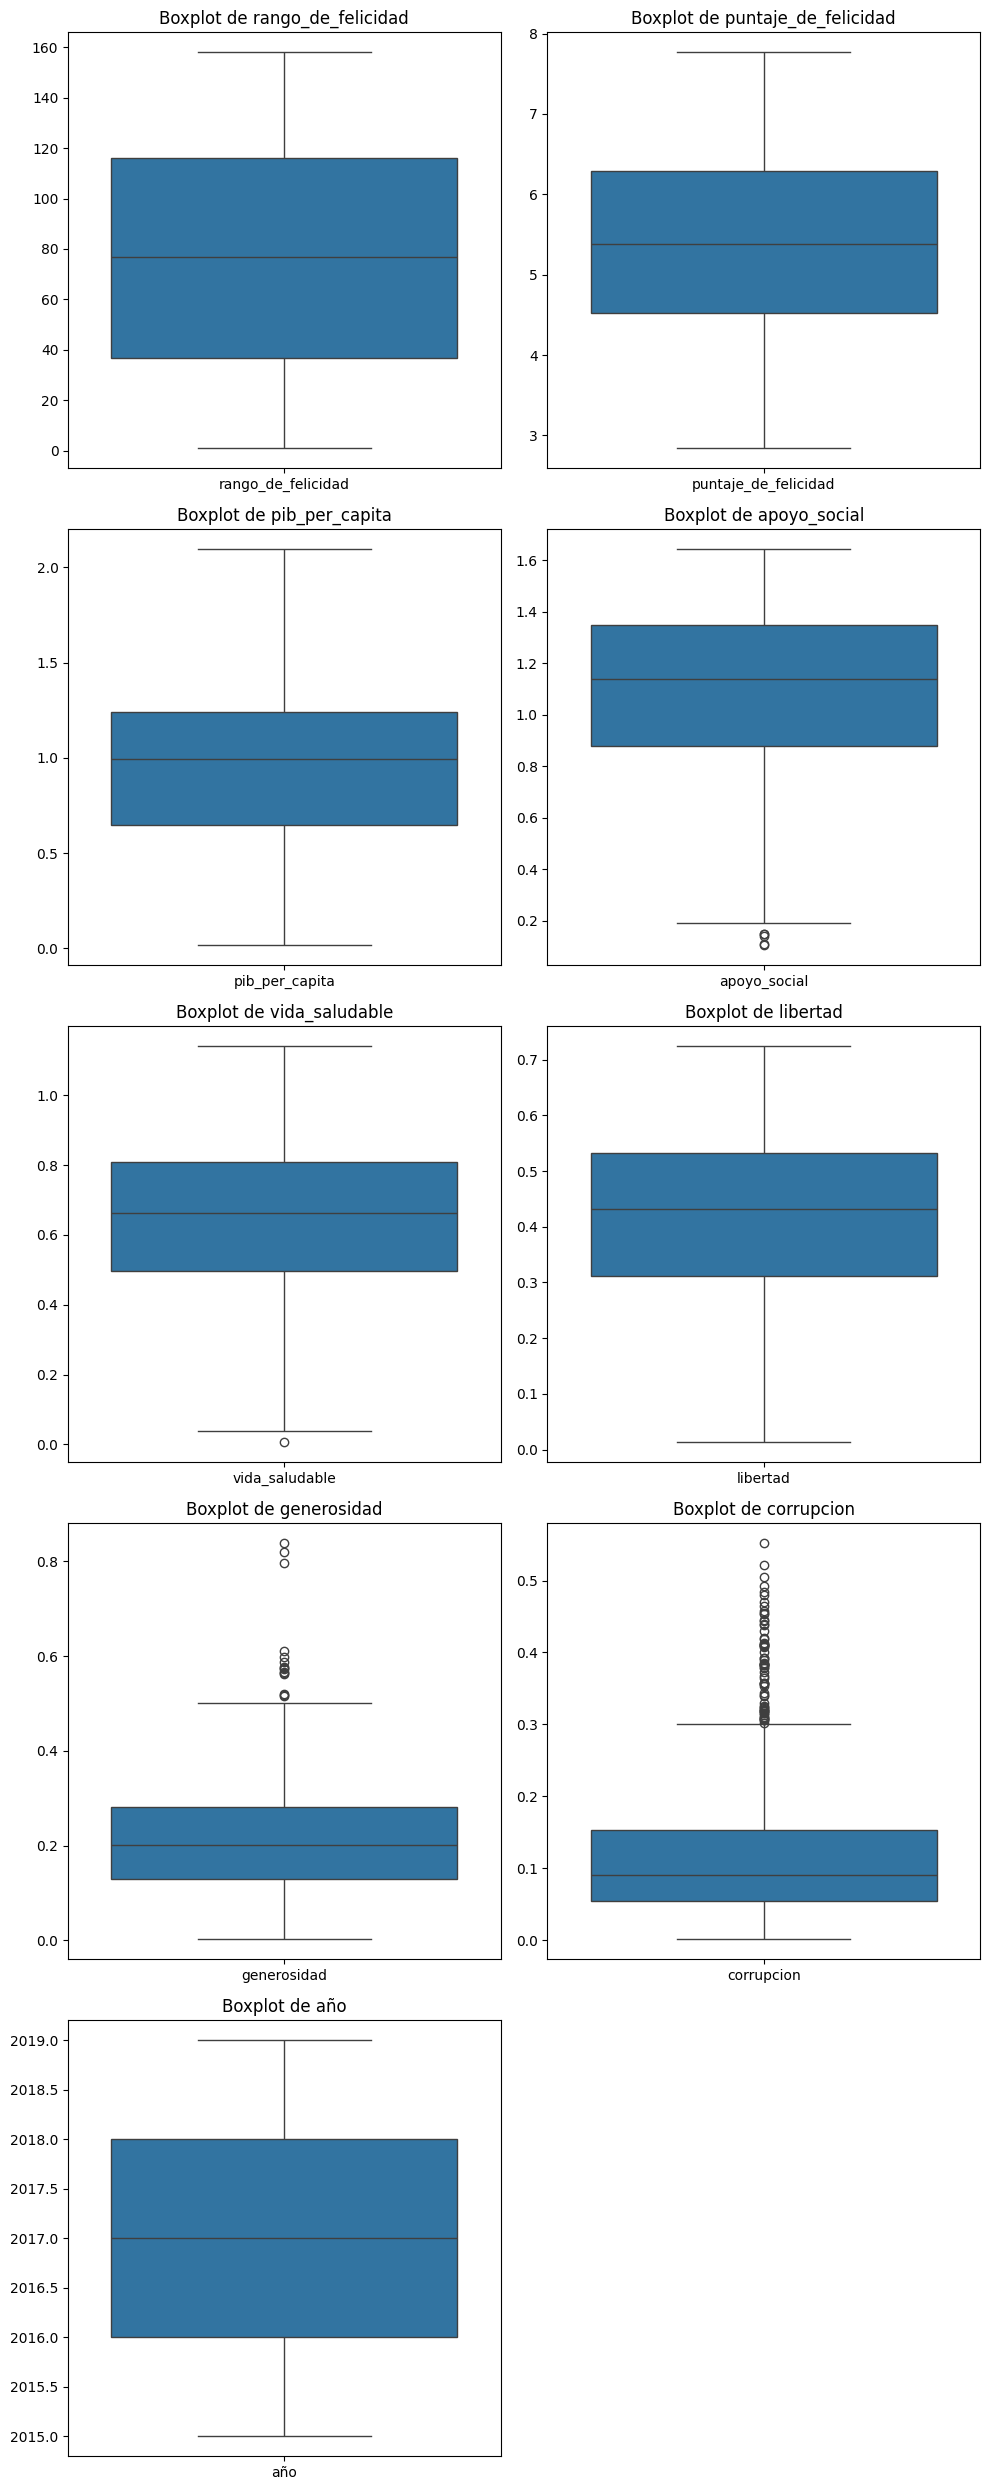

In [12]:
# Nos permite identificar outliers. Sin embargo, no los quitaremos

def graficar_boxplots(df, columnas):
    n=len(columnas)
    filas=(n + 1) // 2  # número de filas de subgráficos
    plt.figure(figsize=(10, 5 * filas))  # tamaño ajustado al número de filas

    for i, col in enumerate(columnas, 1):
        plt.subplot(filas, 2, i)  # 2 columnas por fila
        sns.boxplot(data=df[[col]])
        plt.title(f"Boxplot de {col}")
        plt.xlabel("")  # opcional: ocultar etiquetas

    plt.tight_layout()
    plt.show()

graficar_boxplots(df, columnas_numericas)

# Análisis descriptivo

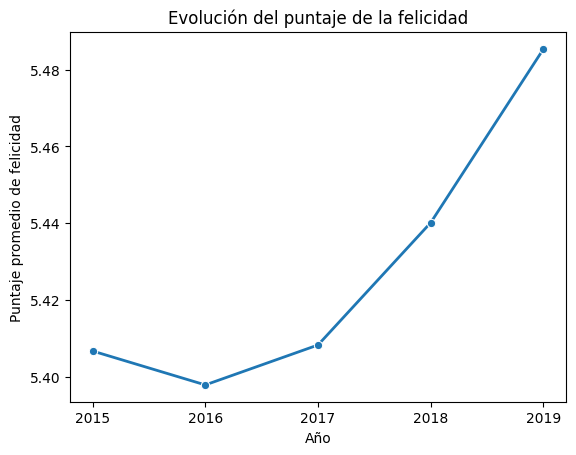

In [13]:
# Evolución del puntaje de felicidad (2015–2019)

# Promedio global por año
promedio_anual = df.groupby('año')['puntaje_de_felicidad'].mean().reset_index()
promedio_anual['año'] = promedio_anual['año'].astype(int)

sns.lineplot(data = promedio_anual, x='año', y='puntaje_de_felicidad', marker='o', linewidth=2)
plt.title('Evolución del puntaje de la felicidad')
plt.ylabel('Puntaje promedio de felicidad')
plt.xlabel('Año')

# Forzar ticks en enteros solamente, para que quite los puntos intermedios
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

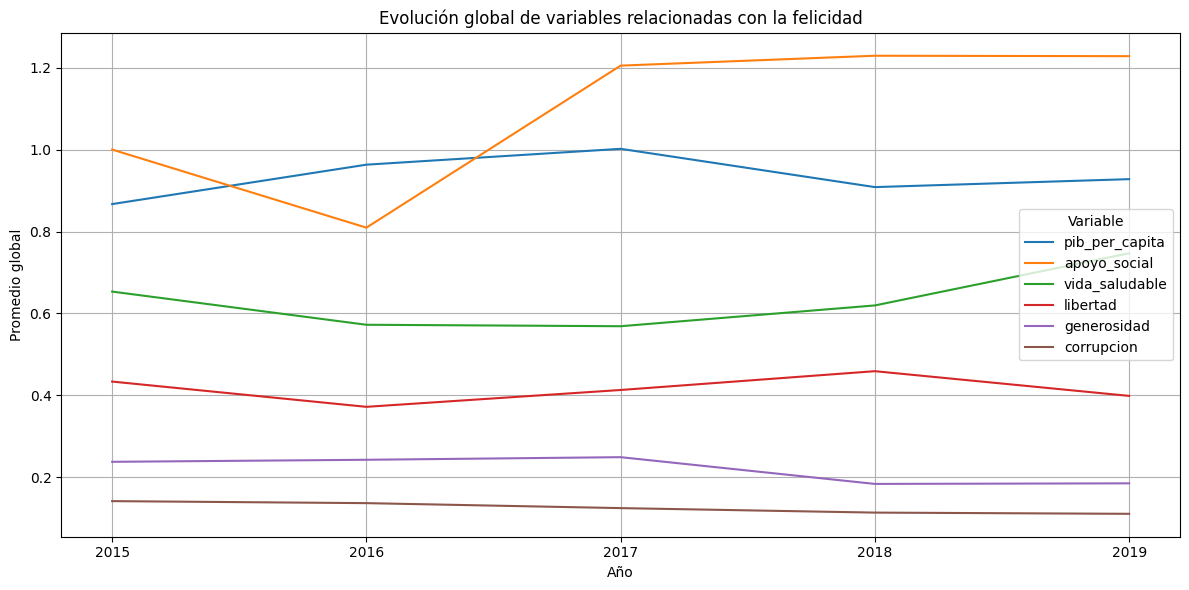

In [14]:
# Variables a analizar
variables = ['pib_per_capita', 'apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion']

# Agrupar y calcular promedio global anual por cada variable
promedios_variables = df.groupby('año')[variables].mean().reset_index()
# print(promedios_variables)

# Graficar evolución de cada variable
plt.figure(figsize=(12, 6))
for var in variables:
    sns.lineplot(data=promedios_variables, x="año", y=var, label=var)

plt.title("Evolución global de variables relacionadas con la felicidad")
plt.xlabel("Año")
plt.ylabel("Promedio global")
plt.legend(title="Variable")
plt.grid(True)
plt.tight_layout()

plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

Cambios en promedio global (2017 - 2016):


C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\856995921.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cambios_2017.values, y=cambios_2017.index, palette='coolwarm')


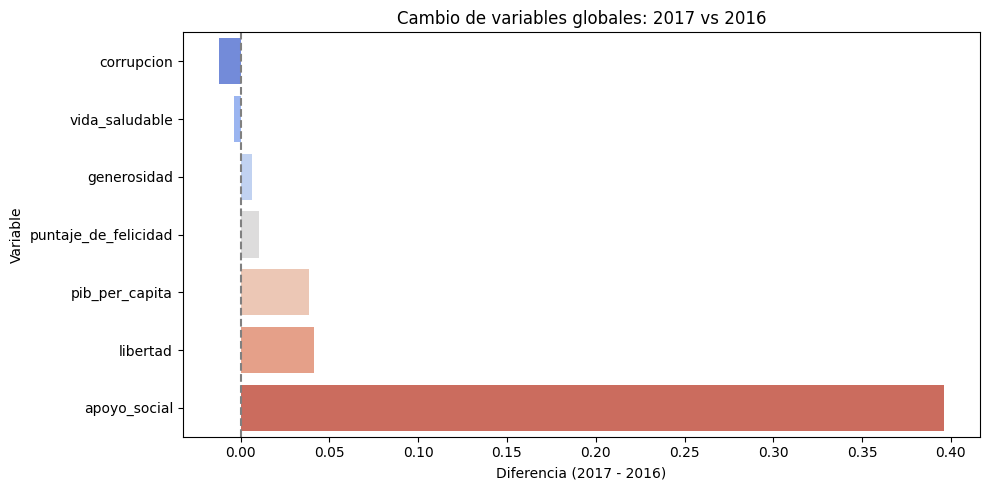

In [15]:
# Variables clave
variables = ['pib_per_capita', 'apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion','puntaje_de_felicidad']

# Calcular promedios anuales
promedios_anuales = df.groupby('año')[variables].mean()

# Calcular diferencia entre 2017 y 2016
cambios_2017 = promedios_anuales.loc[2017] - promedios_anuales.loc[2016]
cambios_2017 = cambios_2017.sort_values()

print("Cambios en promedio global (2017 - 2016):")
# print(cambio_ordenado)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=cambios_2017.values, y=cambios_2017.index, palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Cambio de variables globales: 2017 vs 2016")
plt.xlabel("Diferencia (2017 - 2016)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


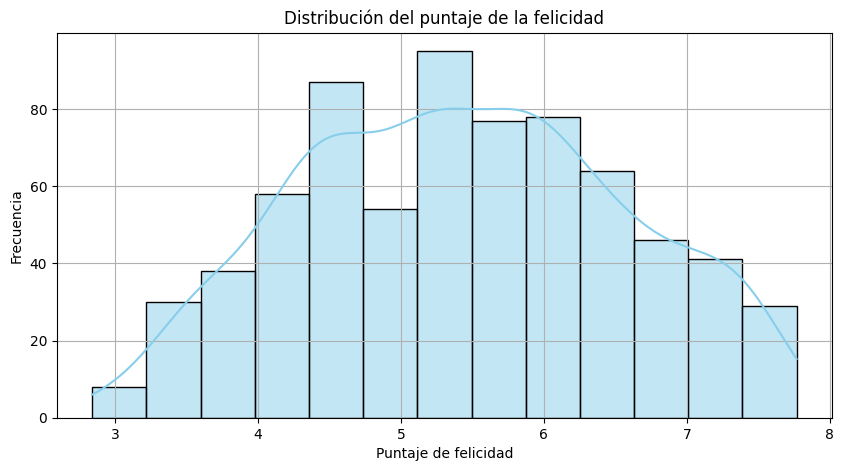

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['puntaje_de_felicidad'], kde=True, color='skyblue')
plt.title('Distribución del puntaje de la felicidad')
plt.xlabel('Puntaje de felicidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\3188135772.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_felicidad.index, y=promedio_felicidad.values, palette='Set2')


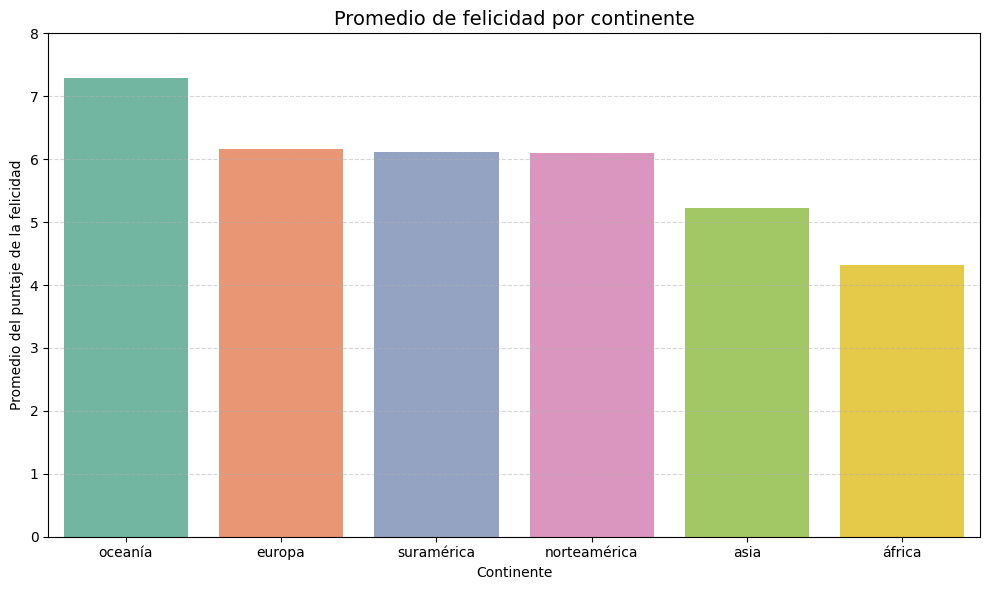

In [17]:
# Agrupar por continente y calcular el promedio de felicidad
promedio_felicidad = df.groupby('continente')['puntaje_de_felicidad'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_felicidad.index, y=promedio_felicidad.values, palette='Set2')
plt.title('Promedio de felicidad por continente', fontsize=14)
plt.ylabel('Promedio del puntaje de la felicidad')
plt.xlabel('Continente')
plt.ylim(0, 8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\2304804156.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mejoraron.index, x=mejoraron['cambio'], ax=ax[0], palette="Greens_r")
C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\2304804156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=empeoraron.index, x=empeoraron['cambio'], ax=ax[1], palette="Reds")


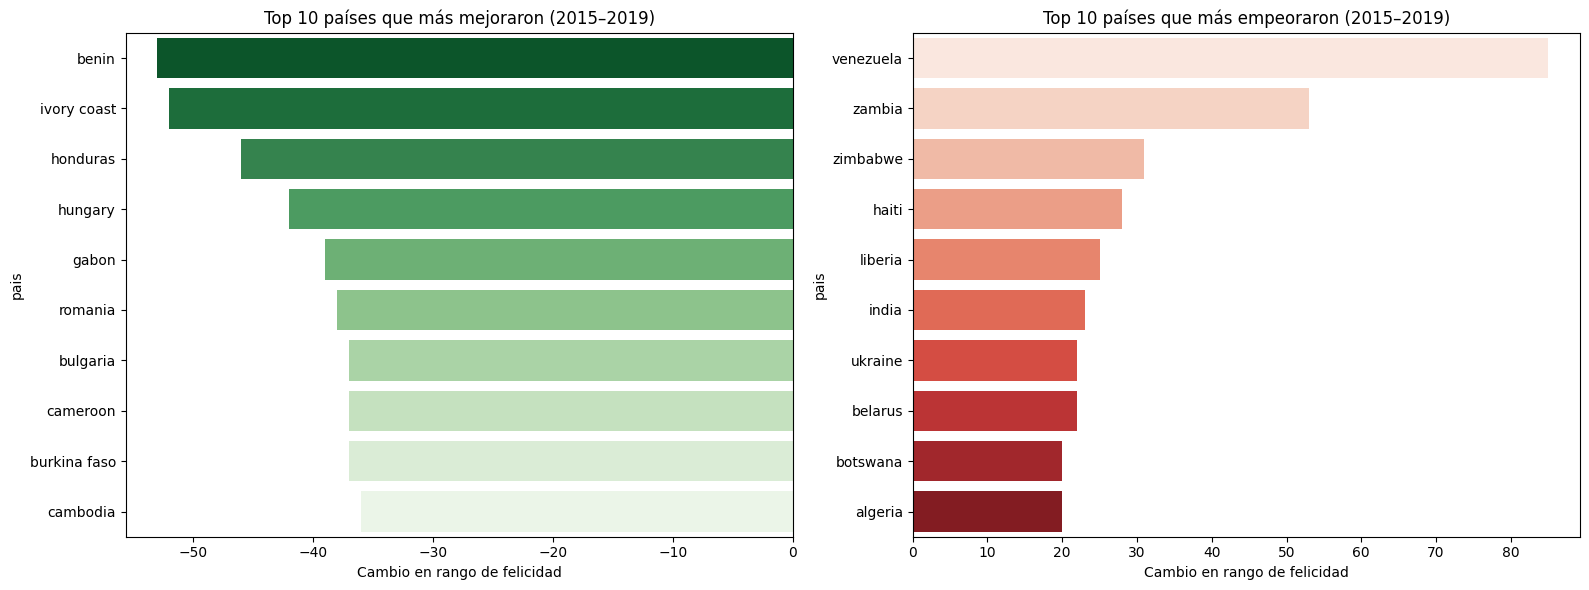

In [18]:
# 3. Mejores y peores países en felicidad (cambio 2015 vs 2019)

# Puntaje en 2015 y 2019 por país
puntaje = df[df['año'].isin([2015, 2019])][['pais', 'año', 'rango_de_felicidad']]
puntaje = puntaje.pivot(index='pais', columns='año', values='rango_de_felicidad')
puntaje['cambio'] = puntaje[2019] - puntaje[2015]

# Top 10 países que más mejoraron y empeoraron
mejoraron = puntaje.sort_values('cambio', ascending=True).head(10)
empeoraron = puntaje.sort_values('cambio', ascending=False).head(10)

# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(y=mejoraron.index, x=mejoraron['cambio'], ax=ax[0], palette="Greens_r")
ax[0].set_title("Top 10 países que más mejoraron (2015–2019)")
ax[0].set_xlabel("Cambio en rango de felicidad")

sns.barplot(y=empeoraron.index, x=empeoraron['cambio'], ax=ax[1], palette="Reds")
ax[1].set_title("Top 10 países que más empeoraron (2015–2019)")
ax[1].set_xlabel("Cambio en rango de felicidad")

plt.tight_layout()
plt.show()


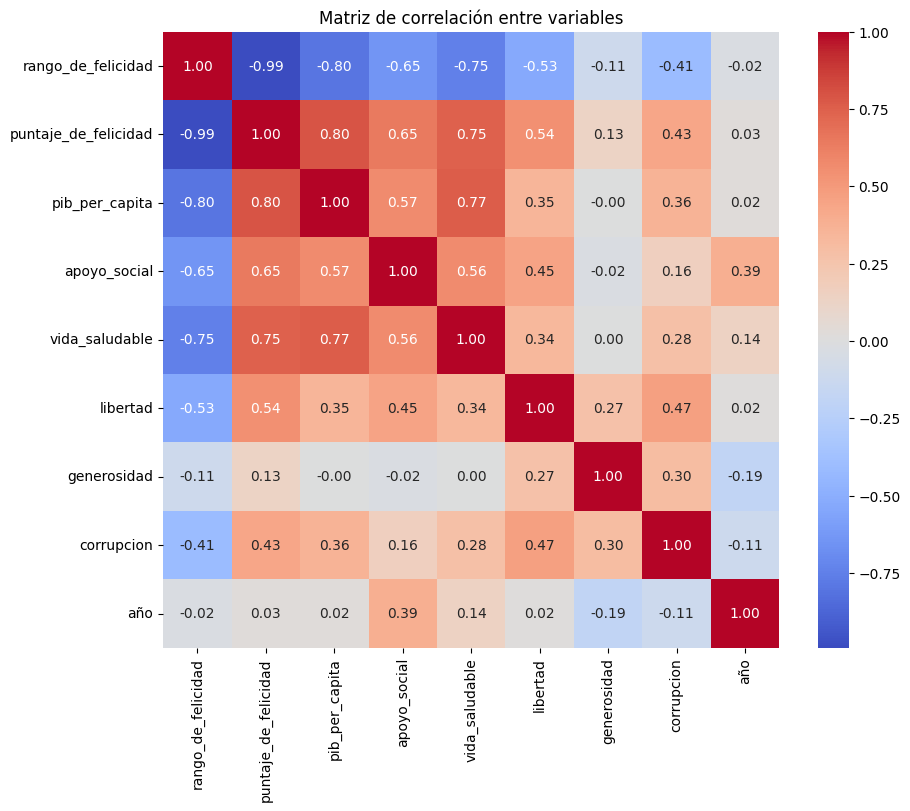

In [19]:
plt.figure(figsize=(10, 8))
corr_matriz = df[columnas_numericas].corr()
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables')
plt.show()


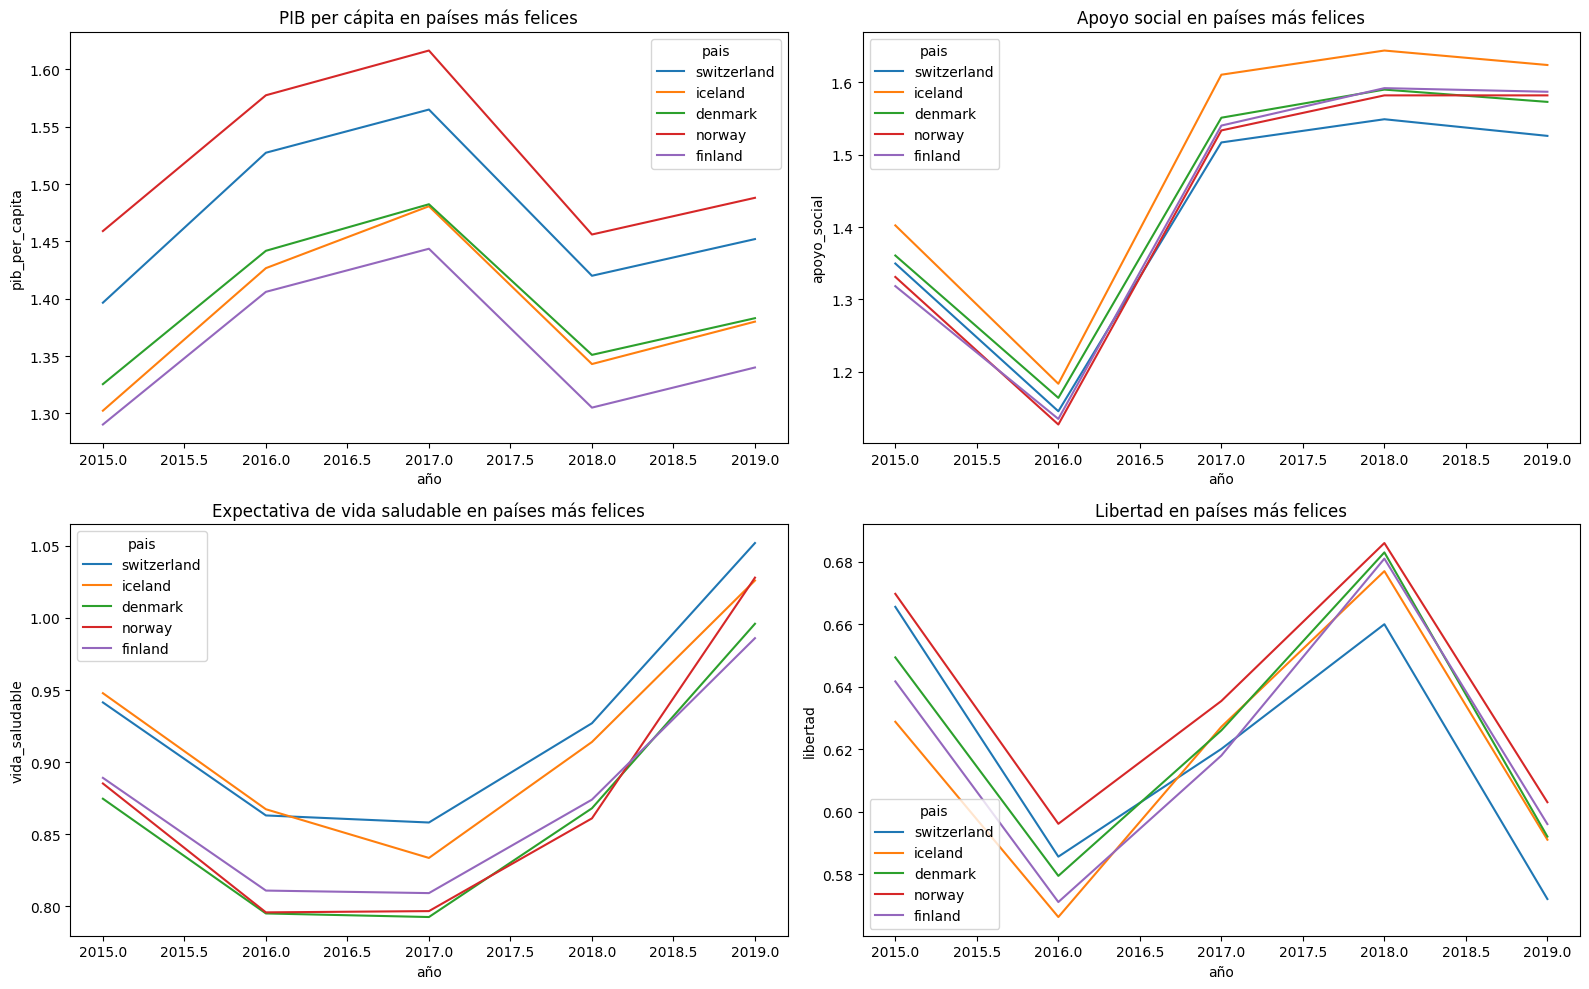

In [20]:
# Estabilidad de factores en países más felices

# Seleccionamos top 5 países más felices en promedio
top_paises = df.groupby('pais')['rango_de_felicidad'].mean().sort_values(ascending=True).head(5).index
top_df = df[df['pais'].isin(top_paises)]

# Gráfico de línea por país y variable
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

sns.lineplot(data=top_df, x='año', y='pib_per_capita', hue='pais', ax=axs[0, 0])
axs[0, 0].set_title('PIB per cápita en países más felices')

sns.lineplot(data=top_df, x='año', y='apoyo_social', hue='pais', ax=axs[0, 1])
axs[0, 1].set_title('Apoyo social en países más felices')

sns.lineplot(data=top_df, x='año', y='vida_saludable', hue='pais', ax=axs[1, 0])
axs[1, 0].set_title('Expectativa de vida saludable en países más felices')

sns.lineplot(data=top_df, x='año', y='libertad', hue='pais', ax=axs[1, 1])
axs[1, 1].set_title('Libertad en países más felices')

plt.tight_layout()

plt.show()

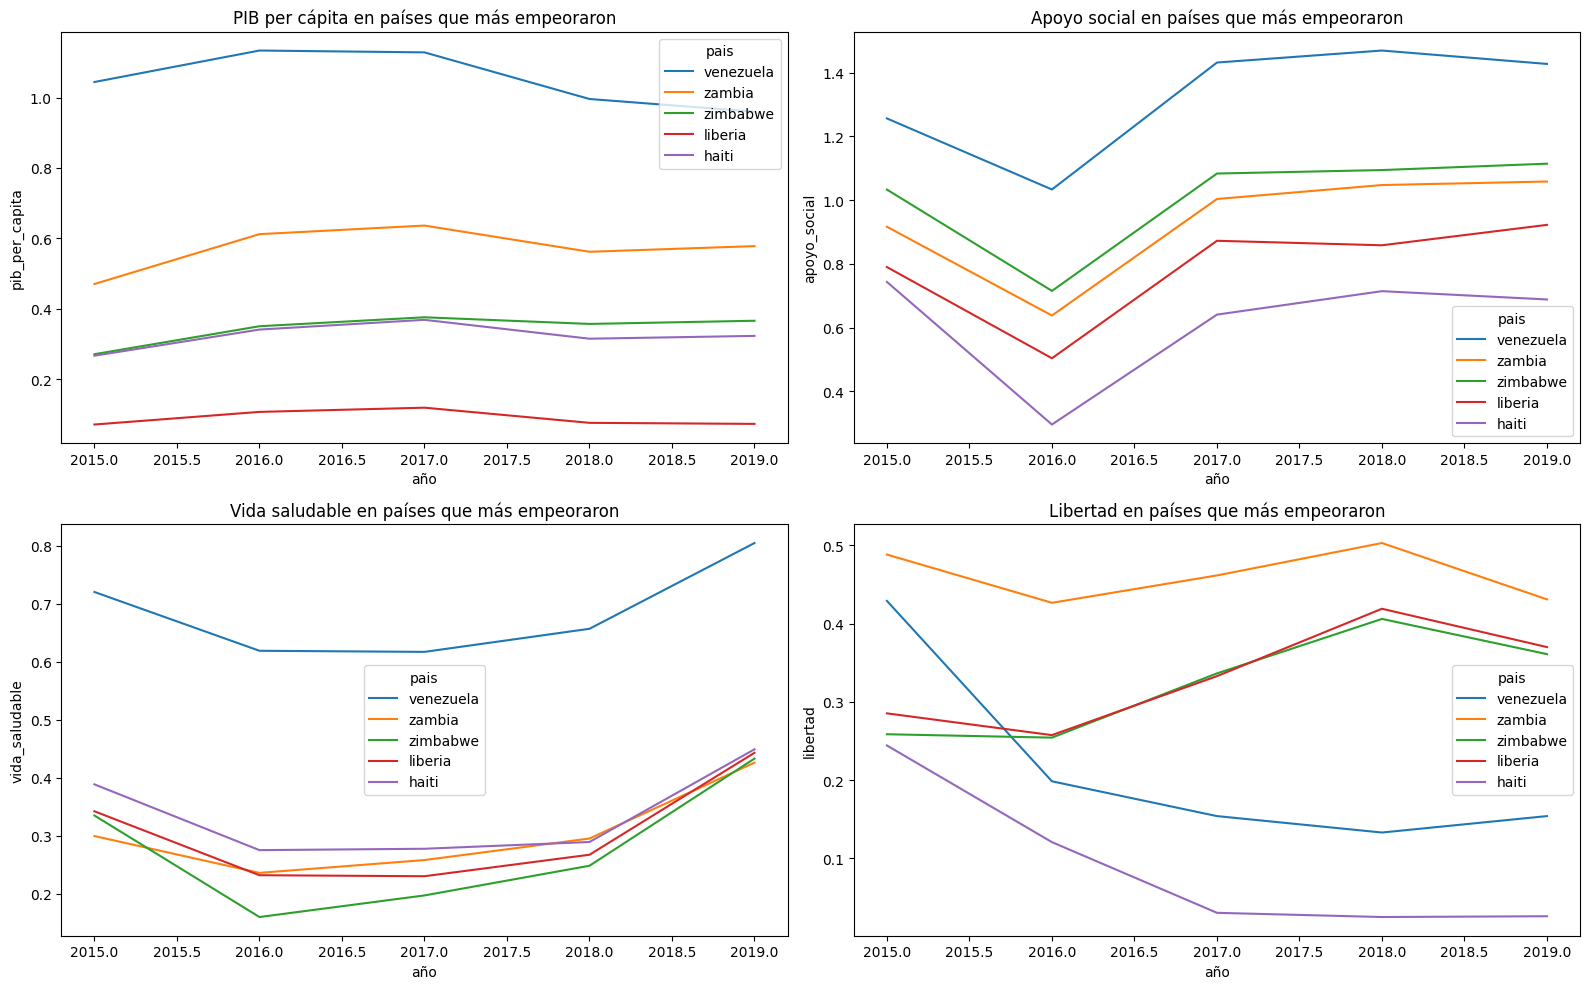

In [21]:
# Calcular cambio en el rango de felicidad (2015 vs 2019)
pivot_rango = df.pivot_table(index='pais', columns='año', values='rango_de_felicidad')

# Solo países que tienen datos en ambos años
pivot_rango = pivot_rango.dropna(subset=[2015, 2019])

# Calcular diferencia (positivo = empeoró)
pivot_rango['cambio'] = pivot_rango[2019] - pivot_rango[2015]

# Top 5 países que más empeoraron (mayor aumento en el ranking)
peores_paises = pivot_rango.sort_values('cambio', ascending=False).head(5).index
peores_df = df[df['pais'].isin(peores_paises)]

# Gráficos
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

sns.lineplot(data=peores_df, x='año', y='pib_per_capita', hue='pais', ax=axs[0, 0])
axs[0, 0].set_title('PIB per cápita en países que más empeoraron')

sns.lineplot(data=peores_df, x='año', y='apoyo_social', hue='pais', ax=axs[0, 1])
axs[0, 1].set_title('Apoyo social en países que más empeoraron')

sns.lineplot(data=peores_df, x='año', y='vida_saludable', hue='pais', ax=axs[1, 0])
axs[1, 0].set_title('Vida saludable en países que más empeoraron')

sns.lineplot(data=peores_df, x='año', y='libertad', hue='pais', ax=axs[1, 1])
axs[1, 1].set_title('Libertad en países que más empeoraron')

plt.tight_layout()
plt.show()


C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\4141174781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_felices.values, y=top_10_felices.index, palette="viridis")


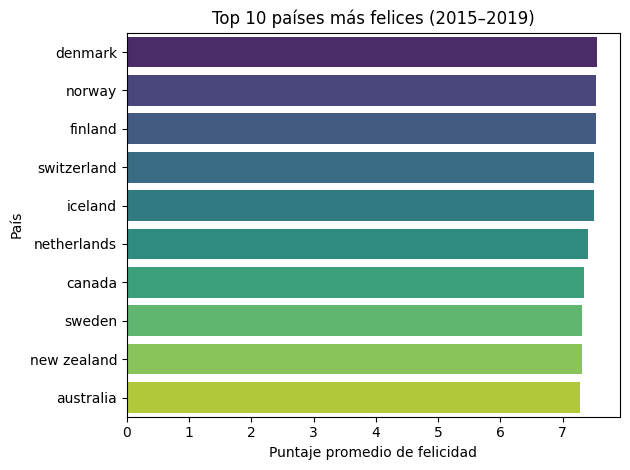

In [22]:
# Agrupar por país y calcular el puntaje promedio de felicidad
ranking_felicidad = df.groupby('pais')['puntaje_de_felicidad'].mean().sort_values(ascending=False)

# Tomar el top 10
top_10_felices = ranking_felicidad.head(10)

# Gráfico de barras
sns.barplot(x=top_10_felices.values, y=top_10_felices.index, palette="viridis")
plt.title("Top 10 países más felices (2015–2019)")
plt.xlabel("Puntaje promedio de felicidad")
plt.ylabel("País")
plt.tight_layout()
plt.show()

Top 10 países con mejor ranking de felicidad (2015–2019):


C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\2895553963.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_rango.values, y=top_10_rango.index, palette="crest")


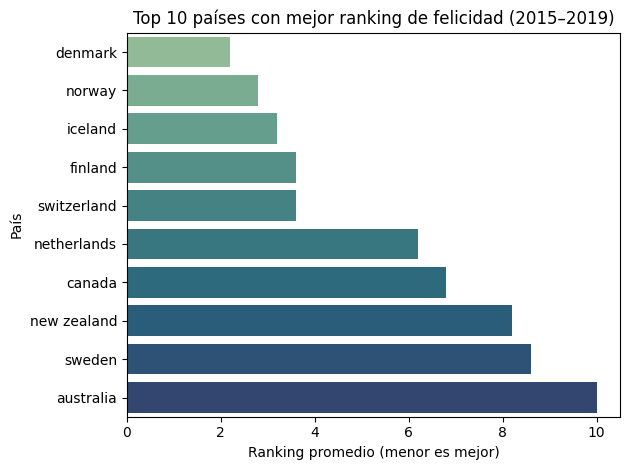

In [23]:
# Calcular el promedio del rango de felicidad por país (menor es mejor)
ranking_promedio = df.groupby('pais')['rango_de_felicidad'].mean().sort_values()

# Seleccionar los 10 países con mejor rango promedio (más alto en el ranking)
top_10_rango = ranking_promedio.head(10)

# Mostrar resultados
print("Top 10 países con mejor ranking de felicidad (2015–2019):")

# Gráfico de barras invertido
sns.barplot(x=top_10_rango.values, y=top_10_rango.index, palette="crest")
plt.title("Top 10 países con mejor ranking de felicidad (2015–2019)")
plt.xlabel("Ranking promedio (menor es mejor)")
plt.ylabel("País")
plt.tight_layout()
plt.show()


Top 10 países con peor ranking de felicidad (2015–2019):


C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\795613746.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_rango.values, y=top_10_rango.index, palette="dark:salmon_r")


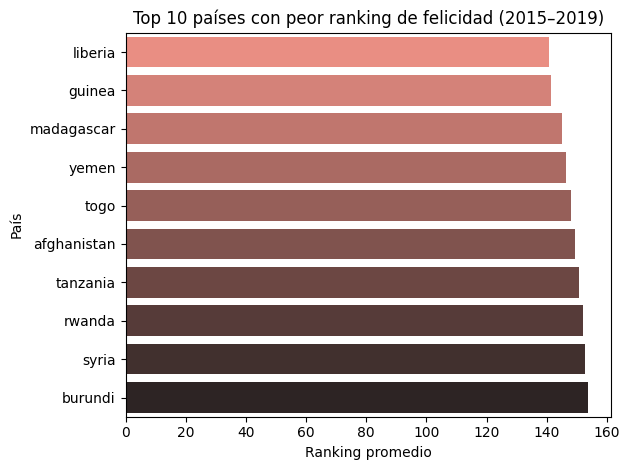

In [24]:
# Calcular el promedio del rango de felicidad por país)
ranking_promedio = df.groupby('pais')['rango_de_felicidad'].mean().sort_values(ascending=False)

# Seleccionar los 10 países con peor rango promedio (más bajo en el ranking)
top_10_rango = ranking_promedio.head(10).sort_values()

# Mostrar resultados
print("Top 10 países con peor ranking de felicidad (2015–2019):")
# print(top_10_rango)

# Gráfico de barras invertido
sns.barplot(x=top_10_rango.values, y=top_10_rango.index, palette="dark:salmon_r")
plt.title("Top 10 países con peor ranking de felicidad (2015–2019)")
plt.xlabel("Ranking promedio")
plt.ylabel("País")
plt.tight_layout()
plt.show()


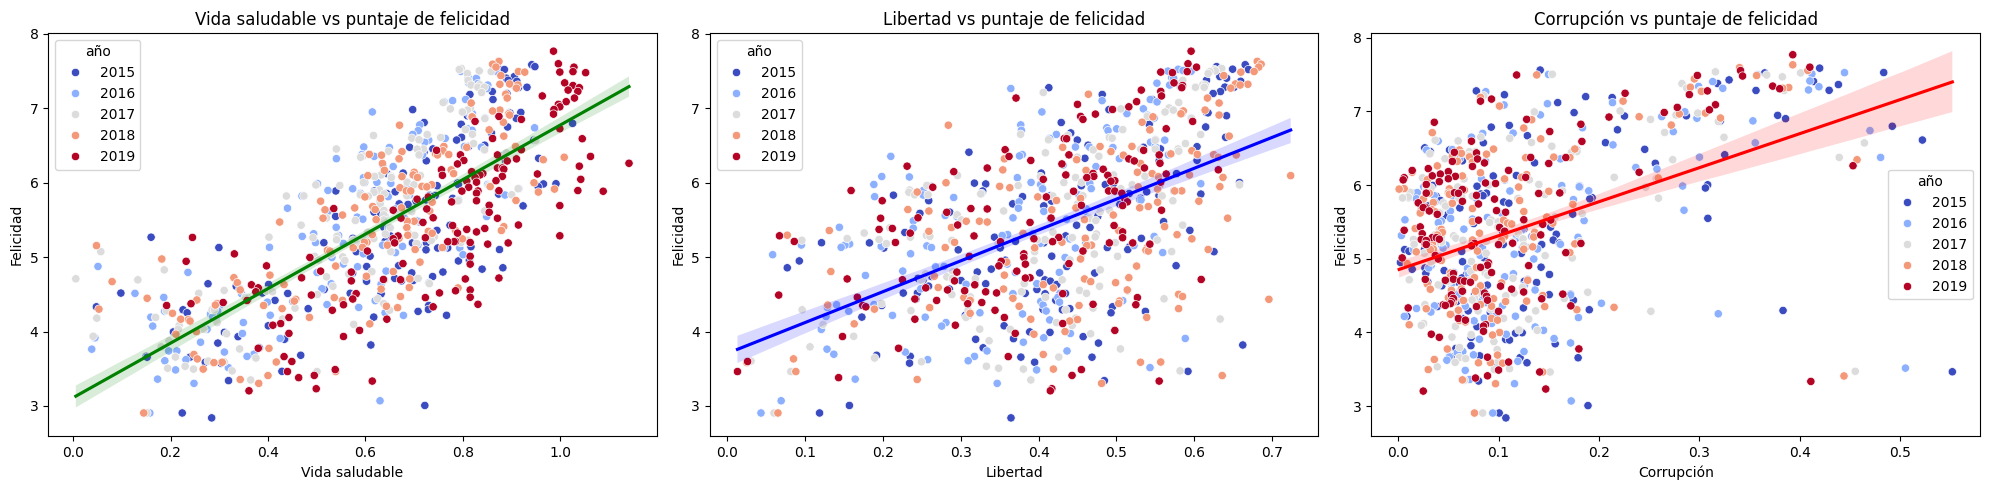

In [25]:
# Variables de interés
variables = ['vida_saludable', 'libertad', 'corrupcion']
colores = ['green', 'blue', 'red']
titulos = ['Vida saludable', 'Libertad', 'Corrupción']
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, var in enumerate(variables):
    sns.scatterplot(data=df, x=var, y='puntaje_de_felicidad', hue='año', palette='coolwarm', ax=axs[i])
    sns.regplot(data=df, x=var, y='puntaje_de_felicidad', scatter=False, ax=axs[i], color=colores[i])
    axs[i].set_title(f'{titulos[i]} vs puntaje de felicidad')
    axs[i].set_ylabel('Felicidad')
    axs[i].set_xlabel(titulos[i])

plt.tight_layout()
plt.show()

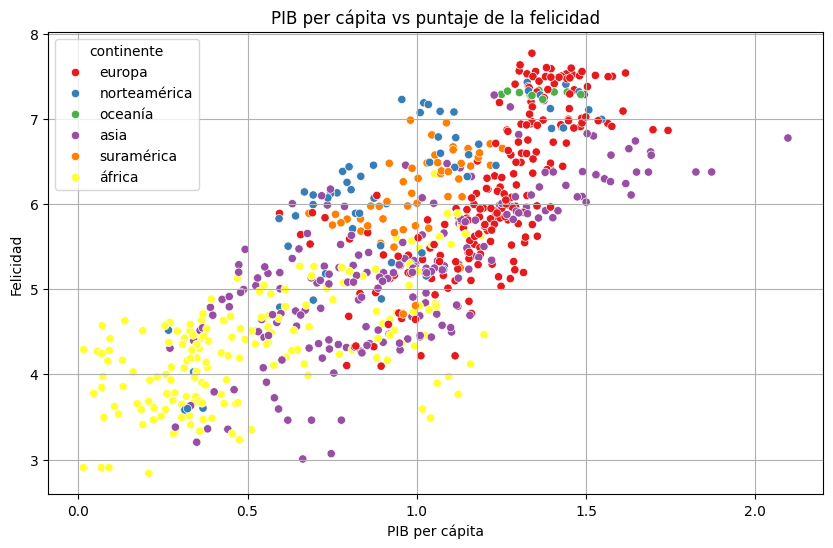

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pib_per_capita', y='puntaje_de_felicidad', hue='continente', palette='Set1')
plt.title('PIB per cápita vs puntaje de la felicidad')
plt.xlabel('PIB per cápita')
plt.ylabel('Felicidad')
plt.grid(True)
plt.show()

Top 10 países que más mejoraron su felicidad sin depender del PIB:
                     cambio_felicidad  cambio_pib
pais                                             
togo                            1.246       0.066
honduras                        1.072       0.047
burkina faso                    1.000       0.073
hungary                         0.958       0.080
gabon                           0.903      -0.003
burundi                         0.870       0.031
latvia                          0.842       0.074
congo (brazzaville)             0.823      -0.006
bulgaria                        0.793       0.080
niger                           0.783       0.069


C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\451082726.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_sostenibles, x='cambio_felicidad', y='pais', palette='Greens_r')


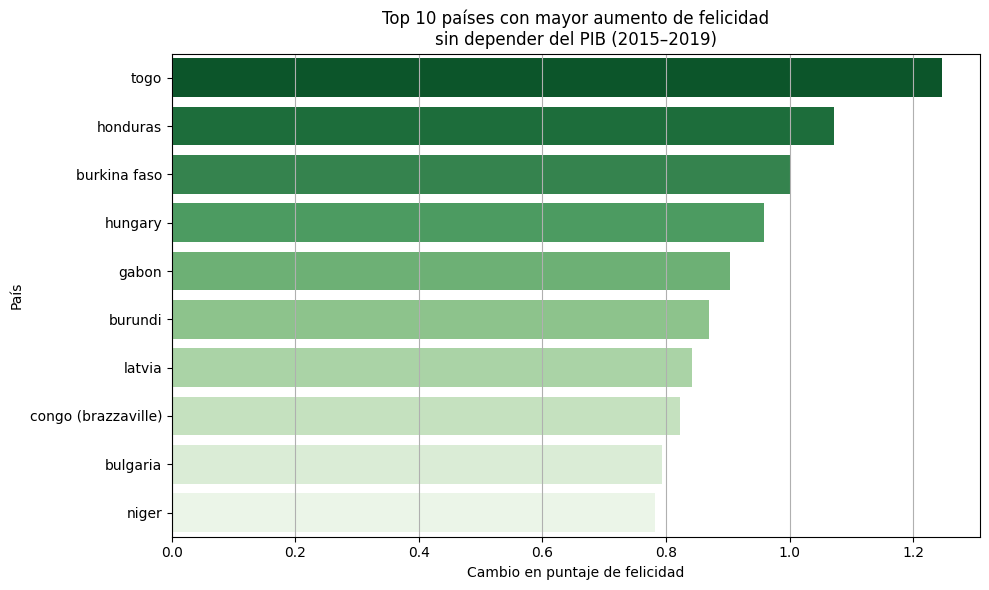

In [27]:
# Extraer datos de 2015 y 2019
df_2015 = df[df['año'] == 2015].set_index('pais')
df_2019 = df[df['año'] == 2019].set_index('pais')

# Aseguramos q los países estén en ambos años
common_countries = df_2015.index.intersection(df_2019.index)

# Calculamos diferencias
cambio = pd.DataFrame(index=common_countries)
cambio['cambio_felicidad'] = df_2019.loc[common_countries, 'puntaje_de_felicidad'] - df_2015.loc[common_countries, 'puntaje_de_felicidad']
cambio['cambio_pib'] = df_2019.loc[common_countries, 'pib_per_capita'] - df_2015.loc[common_countries, 'pib_per_capita']

# Filtramos países que mejoraron sin depender del PIB
candidatos = cambio[(cambio['cambio_felicidad'] > 0.5) & (cambio['cambio_pib'] < 0.1)].sort_values(by='cambio_felicidad', ascending=False)
candidatos['pais'] = candidatos.index  # Para facilitar el gráfico

# Scamos el top 10
top_10_sostenibles = candidatos.head(10)

# Mostramos la tabla
print("Top 10 países que más mejoraron su felicidad sin depender del PIB:")
print(top_10_sostenibles[['cambio_felicidad', 'cambio_pib']].round(3))

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_sostenibles, x='cambio_felicidad', y='pais', palette='Greens_r')
plt.title('Top 10 países con mayor aumento de felicidad\nsin depender del PIB (2015–2019)')
plt.xlabel('Cambio en puntaje de felicidad')
plt.ylabel('País')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


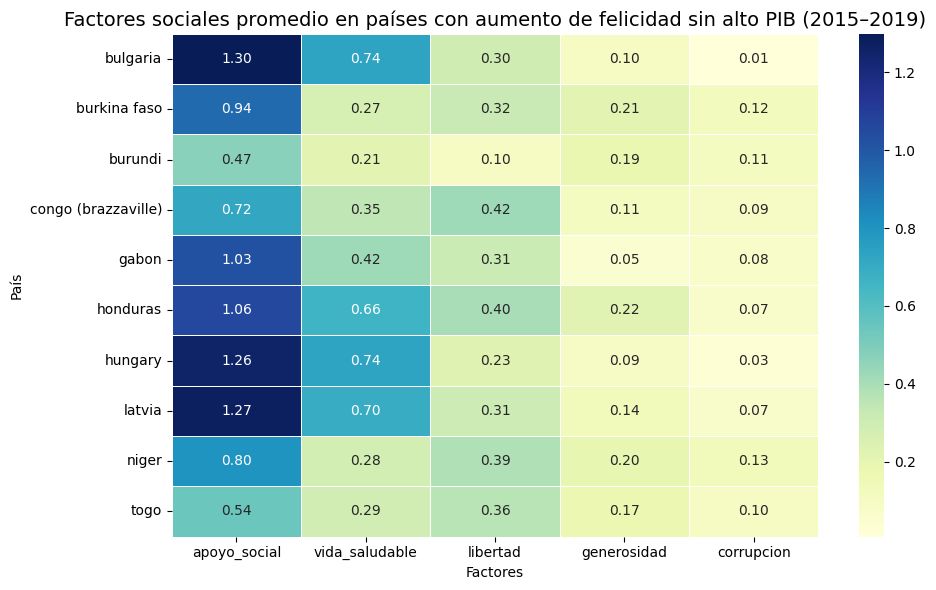

In [28]:
# Top 10 países que más aumentaron su felicidad sin tener un alto PIB

# Filtramos solo los países
top_df = df[df['pais'].isin(top_10_sostenibles['pais'])]

# Calcular promedios por país
variables = ['apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion']
mean_factors = top_df.groupby('pais')[variables].mean()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_factors, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title('Factores sociales promedio en países con aumento de felicidad sin alto PIB (2015–2019)', fontsize=14)
plt.xlabel('Factores')
plt.ylabel('País')
plt.tight_layout()
plt.show()

 Tabla de puntaje promedio de felicidad por continente:
continente   asia  europa  norteamérica  oceanía  suramérica  áfrica
año                                                                 
2015        5.228   6.077         6.144    7.285       6.357   4.251
2016        5.231   6.090         6.085    7.323       6.250   4.246
2017        5.252   6.128         6.023    7.299       6.099   4.284
2018        5.233   6.203         6.098    7.298       5.980   4.356
2019        5.214   6.293         6.152    7.268       5.920   4.454


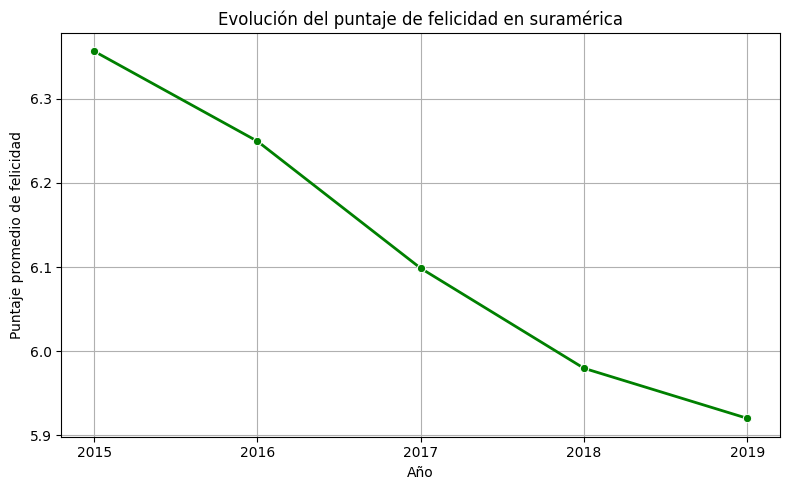

In [29]:
# Promedio anual por continente

tabla_continentes = df.groupby(['continente', 'año'])['puntaje_de_felicidad'].mean().reset_index()
tabla_continentes = tabla_continentes.pivot(index='año', columns='continente', values='puntaje_de_felicidad')
print(" Tabla de puntaje promedio de felicidad por continente:")
print(tabla_continentes.round(3))

# Filtramos solo suramérica
latam_df = df[df['continente'] == 'suramérica']

# Calculamos el promedio anual
latam_avg = latam_df.groupby('año')['puntaje_de_felicidad'].mean().reset_index()

# Graficamos la evolución de la felicidad
plt.figure(figsize=(8, 5))
sns.lineplot(data=latam_avg, x='año', y='puntaje_de_felicidad', marker='o', linewidth=2, color='green')
plt.title('Evolución del puntaje de felicidad en suramérica')
plt.xlabel('Año')
plt.ylabel('Puntaje promedio de felicidad')
plt.grid(True)
plt.tight_layout()

plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

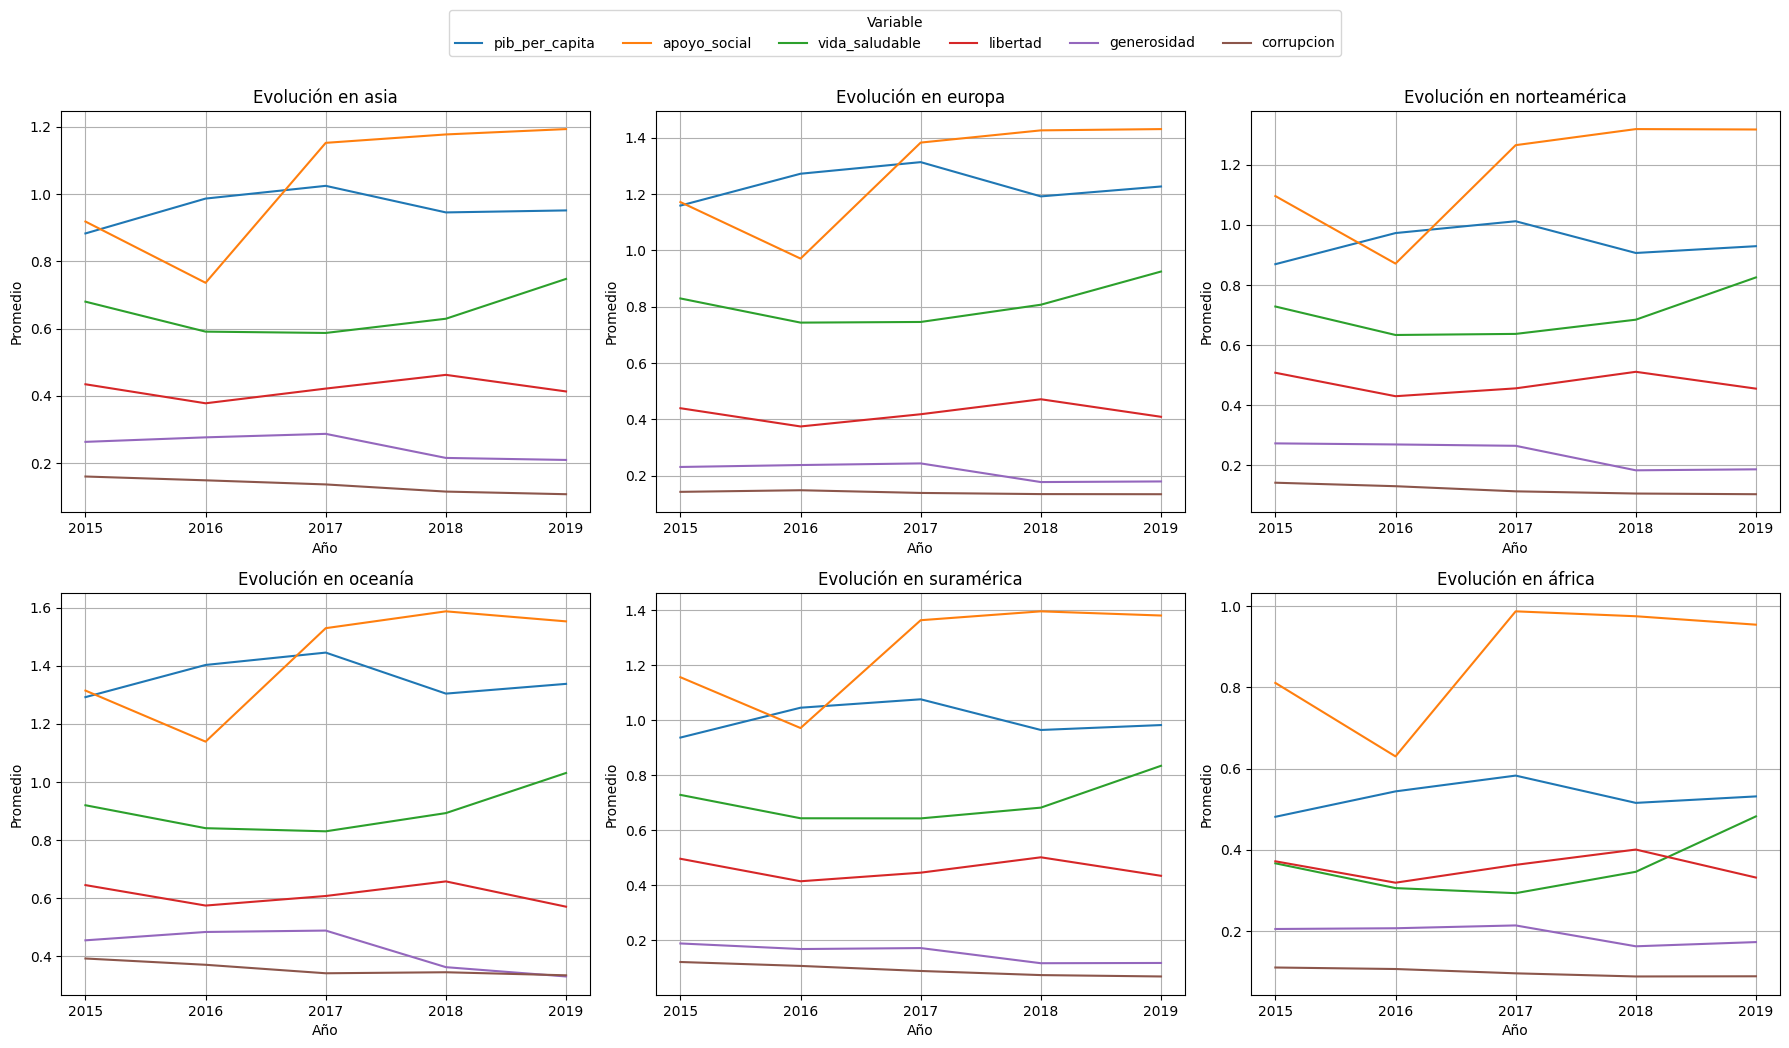

In [30]:
# Comportamiento de los factores importantes por continente

# Variables claves a analizar
variables = ['pib_per_capita', 'apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion']

# Agrupar por continente y año
df_continent = df.groupby(['continente', 'año'])[variables].mean().reset_index()

# Lista ordenada de continentes
continentes = sorted(df['continente'].unique())

# 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

# Graficar cada continente
for i, continente in enumerate(continentes):
    data = df_continent[df_continent['continente'] == continente]
    for var in variables:
        sns.lineplot(data=data, x='año', y=var, ax=axs[i], label=var)
    axs[i].set_title(f"Evolución en {continente}")
    axs[i].set_xlabel("Año")
    axs[i].set_ylabel("Promedio")
    axs[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    axs[i].grid(True)

# Ocultar leyendas individuales y crear una general
for ax in axs:
    leg = ax.get_legend()
    if leg: leg.remove()

# Crear leyenda general
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Variable", loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.05))

# Ajustes finales
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

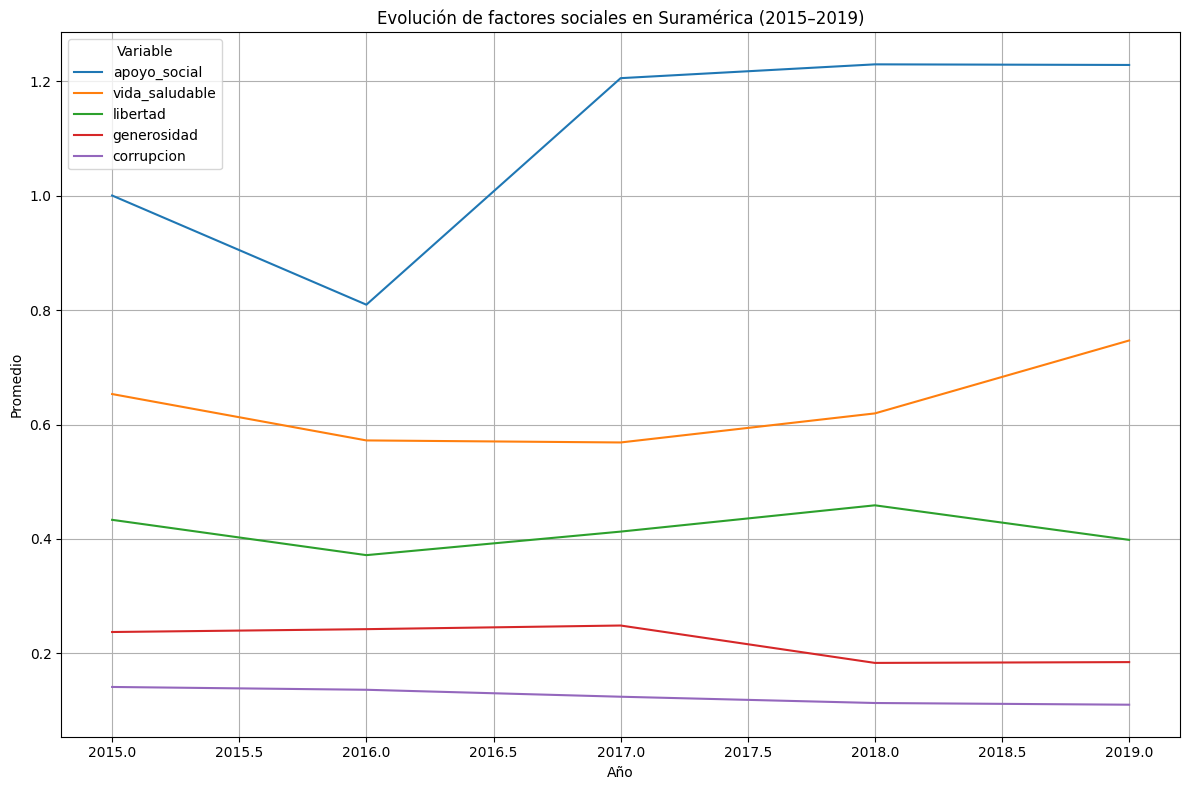

In [31]:
# Comportamiento de los factores importantes por continente

# Variables claves a analizar
variables = ['pib_per_capita', 'apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion']

df_sur=df[df['continente']=="suramérica"]

# Agrupar por continente y año
df_promedio= df.groupby('año')[variables].mean().reset_index()

plt.figure(figsize=(12, 8))
for var in variables[1:]:  # excluyendo puntaje de felicidad
    sns.lineplot(data=df_promedio, x='año', y=var, label=var)

plt.title("Evolución de factores sociales en Suramérica (2015–2019)")
plt.xlabel("Año")
plt.ylabel("Promedio")
plt.legend(title="Variable")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Victor Manuel Roldán\AppData\Local\Temp\ipykernel_52604\3966318428.py:27: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Victor Manuel Roldán\Downloads\PROYECTO_BOOTCAMP\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


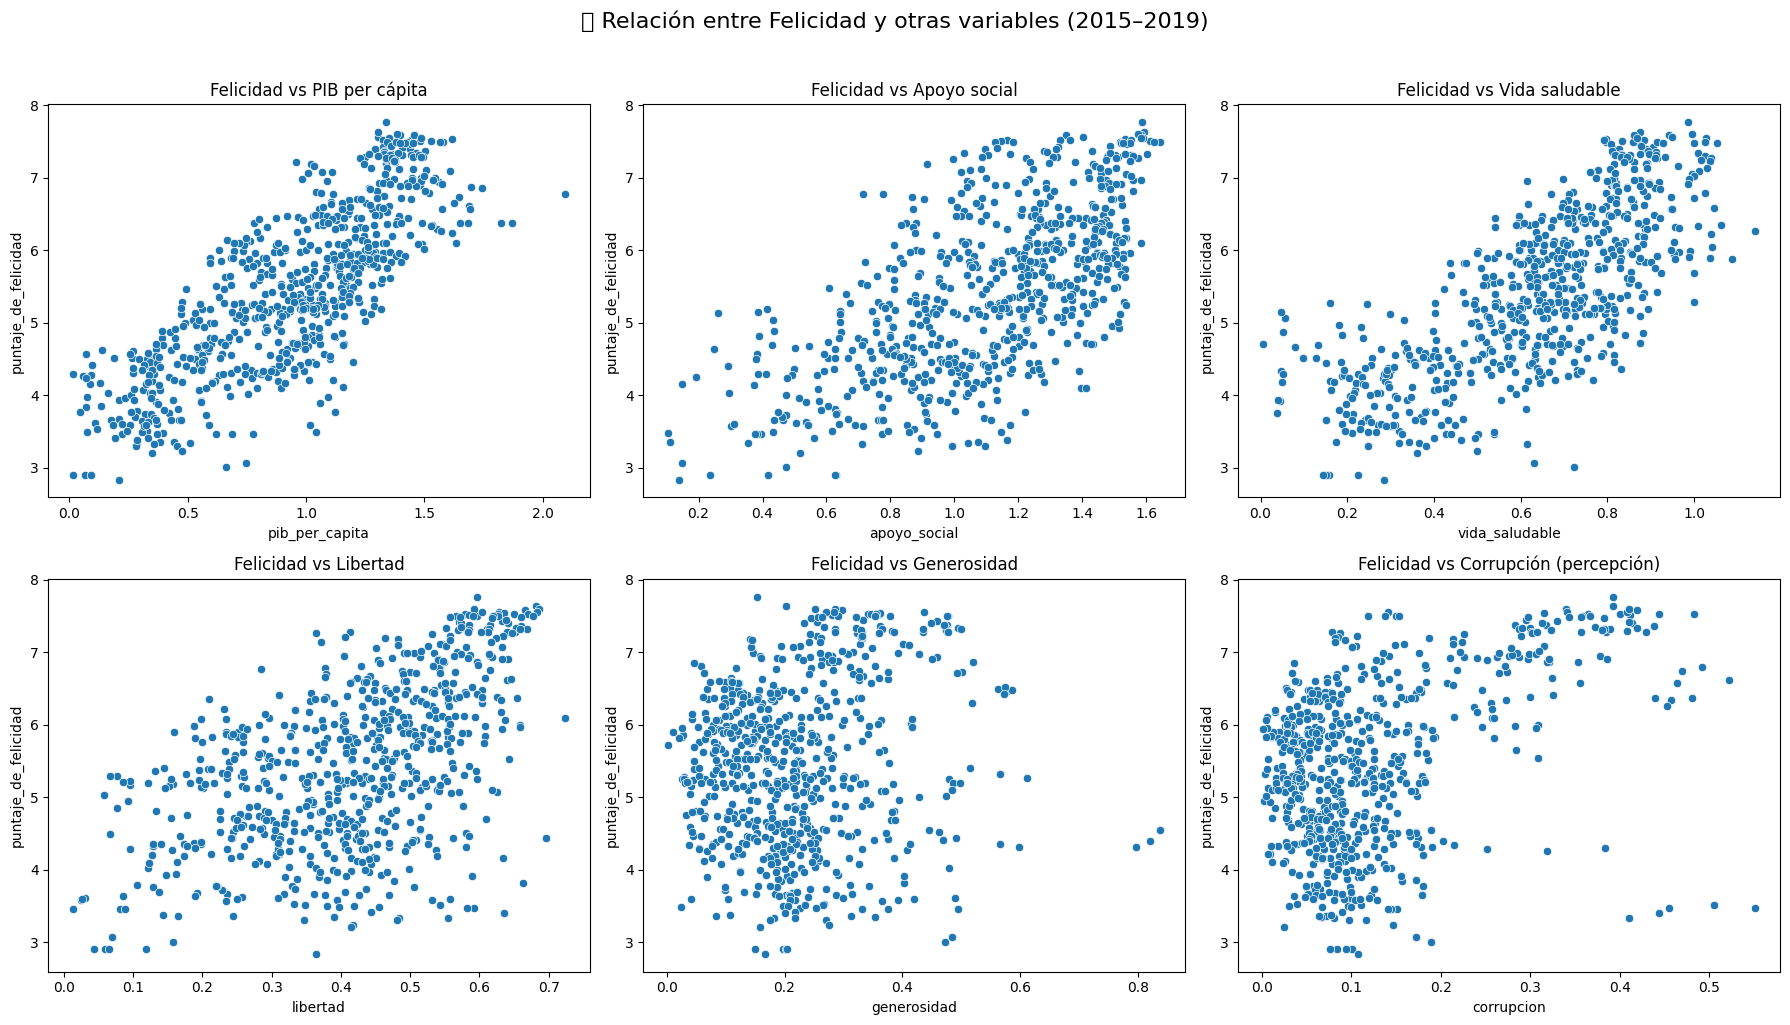

In [32]:
# Selección de variables numéricas
variables = ['puntaje_de_felicidad', 'pib_per_capita', 'apoyo_social', 'vida_saludable',
             'libertad', 'generosidad', 'corrupcion']

# Scatterplots: felicidad vs cada variable
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(data=df, x='pib_per_capita', y='puntaje_de_felicidad', ax=axs[0, 0])
axs[0, 0].set_title('Felicidad vs PIB per cápita')

sns.scatterplot(data=df, x='apoyo_social', y='puntaje_de_felicidad', ax=axs[0, 1])
axs[0, 1].set_title('Felicidad vs Apoyo social')

sns.scatterplot(data=df, x='vida_saludable', y='puntaje_de_felicidad', ax=axs[0, 2])
axs[0, 2].set_title('Felicidad vs Vida saludable')

sns.scatterplot(data=df, x='libertad', y='puntaje_de_felicidad', ax=axs[1, 0])
axs[1, 0].set_title('Felicidad vs Libertad')

sns.scatterplot(data=df, x='generosidad', y='puntaje_de_felicidad', ax=axs[1, 1])
axs[1, 1].set_title('Felicidad vs Generosidad')

sns.scatterplot(data=df, x='corrupcion', y='puntaje_de_felicidad', ax=axs[1, 2])
axs[1, 2].set_title('Felicidad vs Corrupción (percepción)')

plt.suptitle("🟢 Relación entre Felicidad y otras variables (2015–2019)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


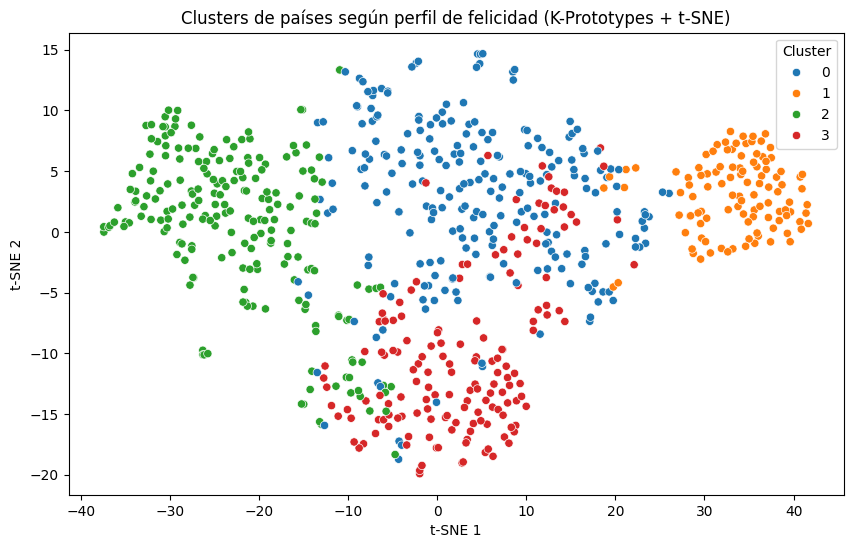

,pais,continente,cluster
584,bangladesh,asia,0
32,colombia,suramérica,0
33,thailand,asia,0
34,saudi arabia,asia,0
443,cambodia,asia,0
70,mauritius,áfrica,0
38,kuwait,asia,0
41,el salvador,norteamérica,0
42,guatemala,norteamérica,0
43,uzbekistan,asia,0


In [ ]:
# !pip install kmodes

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# Selección de columnas a usar
features = ['pais', 'continente', 'puntaje_de_felicidad', 'pib_per_capita',
            'apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion']

# print(df)
df_kproto = df[features].copy()

# Normalizar las variables numéricas
num_cols = ['puntaje_de_felicidad', 'pib_per_capita', 'apoyo_social',
            'vida_saludable', 'libertad', 'generosidad', 'corrupcion']
cat_cols = ['pais', 'continente']

scaler = MinMaxScaler()
df_kproto[num_cols] = scaler.fit_transform(df_kproto[num_cols])

# Convertimos a np.array (todo como string)
matrix = df_kproto.to_numpy()

# Aplicamos KPrototypes (el 2 es el número de clusters, puedes variar)
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=0, random_state=42)
clusters = kproto.fit_predict(matrix, categorical=[0, 1])

# Añadir cluster al DataFrame original
df_kproto['cluster'] = clusters

# Reducimos dimensionalidad para graficar con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
tsne_result = tsne.fit_transform(df_kproto[num_cols])
df_kproto['tsne_1'] = tsne_result[:, 0]
df_kproto['tsne_2'] = tsne_result[:, 1]

# Gráfica final
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kproto, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10')
plt.title('Clusters de países según perfil de felicidad (K-Prototypes + t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

# Vista previa de los países en cada cluster
df_kproto[['pais', 'continente', 'cluster']].drop_duplicates().sort_values('cluster').head(20)

In [34]:
df_kproto.groupby('cluster')[num_cols].mean()

,puntaje_de_felicidad,pib_per_capita,apoyo_social,vida_saludable,libertad,generosidad,corrupcion
cluster,,,,,,,
0,0.584014,0.464316,0.713972,0.591388,0.660209,0.261771,0.194157
1,0.864020,0.678549,0.822098,0.774281,0.803246,0.395174,0.549074
2,0.271016,0.230812,0.435765,0.311653,0.455269,0.258861,0.185098
3,0.543202,0.525656,0.692385,0.660890,0.407853,0.165126,0.101450


In [35]:
df_kproto.groupby('cluster')['pais'].unique()

cluster
0    [israel, costa rica, mexico, brazil, venezuela...
1    [switzerland, iceland, denmark, norway, canada...
2    [nigeria, pakistan, zambia, morocco, tunisia, ...
3    [czech republic, spain, slovakia, italy, moldo...
Name: pais, dtype: object

In [36]:
cols = ['pais', 'continente', 'puntaje_de_felicidad', 'pib_per_capita',
        'apoyo_social', 'vida_saludable', 'libertad', 'generosidad', 'corrupcion']
df_kproto = df[cols].copy()

# Promedio por país
df_kproto_mean = df_kproto.groupby(['pais', 'continente']).mean(numeric_only=True).reset_index()

# Guardar copia original para desescalar después
df_original = df_kproto_mean.copy()

# Escalar las variables numéricas
num_cols = ['puntaje_de_felicidad', 'pib_per_capita', 'apoyo_social',
            'vida_saludable', 'libertad', 'generosidad', 'corrupcion']
scaler = MinMaxScaler()
df_scaled = df_kproto_mean.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Convertir a matriz
cat_cols = ['pais', 'continente']
cat_indices = [df_scaled.columns.get_loc(col) for col in cat_cols]
matrix = df_scaled.to_numpy()

# Entrenar modelo K-Prototypes
kproto = KPrototypes(n_clusters=4, random_state=42, n_init=10)
clusters = kproto.fit_predict(matrix, categorical=cat_indices)

# Añadir clúster a dataframe original y desescalar
df_original['cluster'] = clusters
df_original[num_cols] = scaler.inverse_transform(df_scaled[num_cols])

# PCA para visualización
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[num_cols])
df_original['PCA1'] = components[:, 0]
df_original['PCA2'] = components[:, 1]

# Gráfico interactivo
fig = px.scatter(df_original, x='PCA1', y='PCA2',
                 color=df_original['cluster'].astype(str),
                 hover_name='pais',
                 hover_data={
                     'continente': True,
                     'puntaje_de_felicidad': ':.2f',
                     'pib_per_capita': ':.2f',
                     'PCA1': False,
                     'PCA2': False
                 },
                 title='Distribución de países por perfil de felicidad (K-Prototypes + PCA)',
                 labels={'cluster': 'Cluster'})

fig.update_layout(legend_title_text='Cluster')
fig.show()

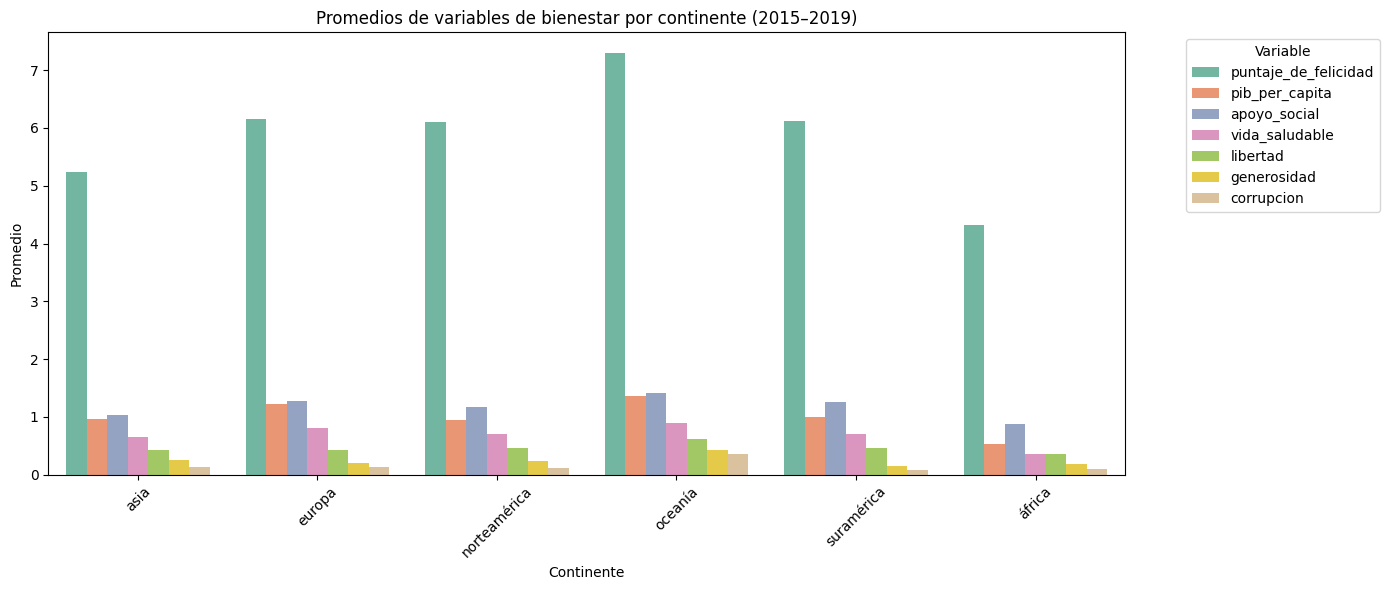

In [37]:
# Agrupar por continente: promedio de las métricas por región
promedios_por_continente = df.groupby('continente')[
    ['puntaje_de_felicidad', 'pib_per_capita', 'apoyo_social',
     'vida_saludable', 'libertad', 'generosidad', 'corrupcion']
].mean().round(2).reset_index()
promedios_melted = promedios_por_continente.melt(id_vars='continente',
                                                 var_name='Variable',
                                                 value_name='Promedio')

plt.figure(figsize=(14, 6))
sns.barplot(data=promedios_melted, x='continente', y='Promedio', hue='Variable', palette='Set2')
plt.title('Promedios de variables de bienestar por continente (2015–2019)')
plt.xlabel('Continente')
plt.ylabel('Promedio')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# En los países más felices, estos factores no solo están presentes sino que se mantienen estables en el tiempo,
# lo que podría explicar su liderazgo sostenido.